## Time Series Analysis: Home Assignment 1

due to **11.02.21 23:00**

You need to upload HA1 to github repository,  the link will be provided later.

Enter your name below: 

In [94]:
name='Tukhtasinov Mukhammad Rajab' 

### Contents

1. **Data preparation (7 points)**

    $1.0$ Download data and import functions
    
    $1.1$ Read data (1 pt.)
    
    $1.2$ Check NAs (1 pt.)
    
    $1.3$ Transform dates (2 pt.)
    
    $1.4$. Make some plots (0.75 pt.)
    
    $1.5$ Split the data (0.75 pt.)
    
 
2. **ETS (7 points)**

    $2.1$ Estimate ETS (1 pt.)
    
    $2.2$ Point forecasts (1 pt.)
    
    $2.3$ Interval forecasts 1 (1 pt.)
    
    $2.4$ Interval forecasts 2 (1 pt.)
    
    $2.5$ Forecast quality metrics (2 pt.)
    
    $2.6$ Model comparison (1 pt.)
    

## 1. Data preparation (7 pt.)

### 1.0 Download data and import functions
[back to contents](#Contents)

You have to download [BI_TSA_HA_1_data.csv](https://github.com/bdemeshev/ts603/blob/master/2021-spring/BI_TSA_HA_1_data.csv), which represents quarterly sales of Walmart from 1984 to 2020. The sourse of the data is [ycharts.com](https://ycharts.com/companies/WMT/revenues). 

In [2]:
import pandas as pd
import numpy as np
from sktime.utils.plotting import plot_series
from sktime.forecasting.model_selection import temporal_train_test_split
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
from sklearn.metrics import  mean_absolute_error, mean_squared_error

### 1.1 Read data (1 pt.)
[back to contents](#Contents)

Read the downloaded data from your local computer and name it ``` df ```

Alternatively, you can skip 1.0 and access data directly putting ```'https://raw.github.com/bdemeshev/ts603/master/2021-spring/BI_TSA_HA_1_data.csv'``` inside ```read_csv```

use ``` pd.read_csv('... .csv') ```

In [3]:
#code here (1 pt.)
df = pd.read_csv('https://raw.github.com/bdemeshev/ts603/master/2021-spring/BI_TSA_HA_1_data.csv')

In [4]:
df.head()

,sales,month,day,year
0,134.71,10,31,2020
1,137.74,7,31,2020
2,134.62,4,30,2020
3,141.67,1,31,2020
4,127.99,10,31,2019


### 1.2 Check NAs (1 pt.)
[back to contents](#Contents)

Check whether ``` df ``` contains missing values(NAs):

apply ``` isna().value_counts() ``` to ``` df ```

In [9]:
# code here (0.5 pt.)
df.isna().value_counts()

sales  month  day    year 
False  False  False  False    147
dtype: int64

How many missing values are there in ``` df ```?

In [10]:
# answer (0.5 pt.)
df.isna().sum()

sales    0
month    0
day      0
year     0
dtype: int64

### 1.3 Dates transformation (2 pt.)
[back to contents](#Contents)

How are dates represented in the original dataset? 

In [18]:
# answer (0.5 pt.)
df.info()
# dates are represented as int64 for day, month and year

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sales   147 non-null    float64
 1   month   147 non-null    int64  
 2   day     147 non-null    int64  
 3   year    147 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 4.7 KB


Transform dates to datetime format:

``` df['date']=df['...']*10000+df['...']*100+df['...']*1 ```

``` df['date']=pd.to_datetime(df['date'], format='%Y%m%d') ```

change each ``` df['...'] ``` to one of ``` df['month'] ```, ``` df['year'] ```, ``` df['day'] ```according to ``` format='%Y%m%d'```

In [19]:
# code here (0.5 pt.)
df['date'] = df['year']*10000+df['month']*100+df['day']*1
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')

In [20]:
df.head()

,sales,month,day,year,date
0,134.71,10,31,2020,2020-10-31
1,137.74,7,31,2020,2020-07-31
2,134.62,4,30,2020,2020-04-30
3,141.67,1,31,2020,2020-01-31
4,127.99,10,31,2019,2019-10-31


Change index to dates:

``` df.index=.... ```

In [21]:
# code here (0.25 pt.)
df.index = df['date']

What is the size of the dataset?

use ```.shape```

In [23]:
# code here (0.25 pt.)
df.shape

(147, 5)

Drop columns ['day', 'year','month','date']:

```df=df.drop(..., axis=1)```

In [24]:
# code here (0.25 pt.)
df = df.drop(['day', 'year', 'month', 'date'], axis=1)

What is the size of the dataset now?

In [25]:
# code here (0.25 pt.)
df.shape

(147, 1)

In [26]:
df.head()

,sales
date,
2020-10-31,134.71
2020-07-31,137.74
2020-04-30,134.62
2020-01-31,141.67
2019-10-31,127.99


### 1.4 Plot data (0.75 pt.)
[back to contents](#Contents)

transform data frame column to series:

```y=df['date']```

In [36]:
# code here (0.25 pt.)
y = df['sales']

```plot_series``` gets a series as an argument, whose dates sorted in ascending order.
Transform your time series by changing descending order to ascending order:

apply ```np.flip``` to ```y``` and name the result ```y```

In [37]:
# code here (0.25 pt.)
y = np.flip(y)

Plot the series using ```plot_series()```

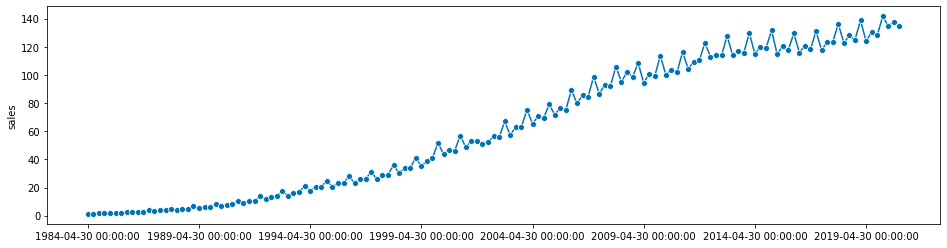

In [39]:
# code here (0.25 pt.)
plot_series(y);

### 1.5 Split data (0.75 pt.)
[back to contents](#Contents)

Split the data into train and test samples:

``` temporal_train_test_split(...) ```

choose ``` test_size=0.2 ```

In [40]:
# code here (0.5 pt.)
train, test = temporal_train_test_split(y, test_size=0.2)

plot train and test samples using ``` plot_series ```

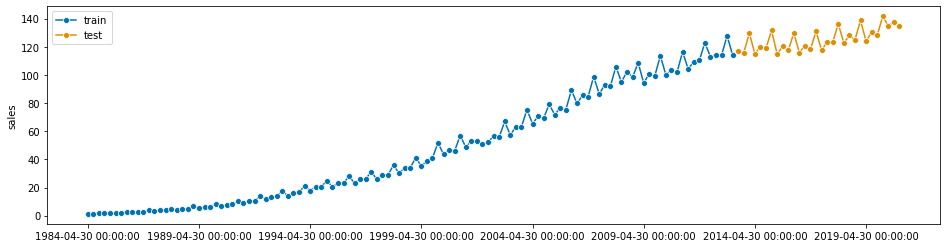

In [49]:
# code here (0.25 pt.)
plot_series(train, test, labels=['train', 'test']);

## 2. ETS (7 pt.)

### 2.1 Estimate ETS (MAA) and (AAM) (1 pt.)
[back to contents](#Contents)

Start with ETS (MAA). Estimate the model and name it ```model_MAA```:

```ETSModel(..., error='...', trend='...', seasonal='...', seasonal_periods=...)```

```fit_MAA=model_MAA.fit()```


In [53]:
# code here (0.5 pt.)
model_MAA = ETSModel(train, error='mul', trend='add', seasonal='add', seasonal_periods=4)
fit_MAA = model_MAA.fit()

/home/vladimir/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'


Estimate ETS (AAM) with the same characteristics:
    
```ETSModel(..., error='...', trend='...', seasonal='...', seasonal_periods=...)```

```fit_AAM=model_AAM.fit()```


In [52]:
# code here (0.5 pt.)
model_AAM = ETSModel(train, error='add', trend='add', seasonal='mul', seasonal_periods=4)
fit_AAM = model_AAM.fit()

/home/vladimir/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'


### 2.2 Point forecasts (1 pt.)
[back to contents](#Contents)

Obtain point forecasts for ETS(MAA) with forecasting horizon=30 quarters:

```fit_MAA.forecast(steps=...)```

In [59]:
# code here (0.25 pt.)
forecast_MAA = fit_MAA.forecast(steps=30)

Obtain point forecasts for ETS(AAM) with forecasting horizon=30 quarters:

```fit_AAM.forecast(steps=...)```

In [60]:
# code here (0.25 pt.)
forecast_AAM = fit_AAM.forecast(steps=30)

Plot both forecasts (AAM) and (MAA), test and train data

```plot_series()```

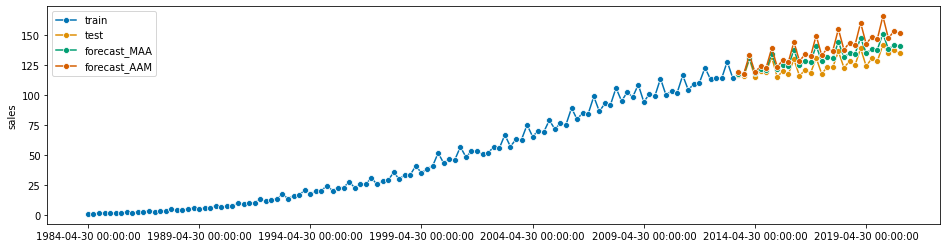

In [62]:
# code here (0.5 pt.)
plot_series(train, test, forecast_MAA, forecast_AAM, labels=['train', 'test', 'forecast_MAA', 'forecast_AAM']);

### 2.3 Interval forecasts ETS(MAA) (1 pt.)
[back to contents](#Contents)

Get 95% confidence intervals:

```pred_MAA=fit_MAA.get_prediction(start='2013-07-31', end='2020-10-31') ```

``` pred_MAA=pred_MAA.summary_frame(alpha=0.05) ```

Expract upper and lower bounds from ```pred_MAA``` and name them ```upper_int``` and ```lower_int```


In [70]:
# code here (0.5 pt.)
pred_MAA = fit_MAA.get_prediction(start='2013-07-31', end='2020-10-31')
pred_MAA = pred_MAA.summary_frame(alpha=0.05)
upper_int = pred_MAA['mean'].max()
lower_int = pred_MAA['mean'].min()

Plot interval predictions:

```plot_series()```

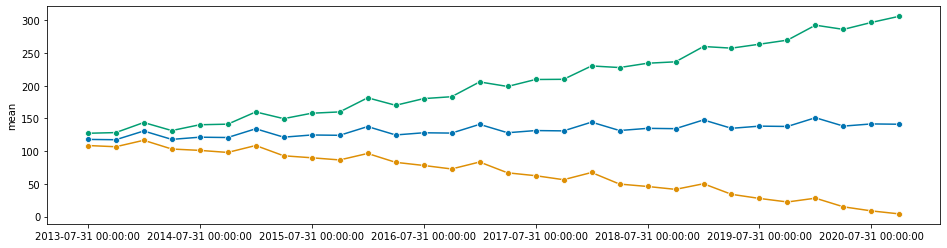

In [78]:
# code here (0.5 pt.)
plot_series(pred_MAA['mean'], pred_MAA['pi_lower'], pred_MAA['pi_upper']);

### 2.4 Interval forecasts ETS(AAM) (1 pt.)
[back to contents](#Contents)

Get 95% confidence intervals:

``` pred_AAM=fit_AAM.get_prediction(start='2013-07-31', end='2020-10-31') ```

``` pred_AAM=pred_AAM.summary_frame(alpha=0.05) ```

Expract upper and lower bounds from ```pred_MAA``` and name them ```upper_int``` and ```lower_int```

In [73]:
# code here (0.5 pt.)
pred_AAM=fit_AAM.get_prediction(start='2013-07-31', end='2020-10-31')
pred_AAM=pred_AAM.summary_frame(alpha=0.05)
upper_int = pred_AAM['mean'].max()
lower_int = pred_AAM['mean'].min()

Plot interval predictions:

```plot_series()```

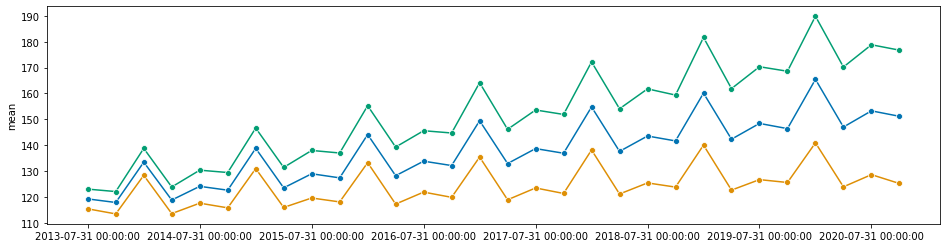

In [80]:
# code here (0.5 pt.)
plot_series(pred_AAM['mean'], pred_AAM['pi_lower'], pred_AAM['pi_upper']);

### 2.5 Forecast quality metrics (2 pt.)
[back to contents](#Contents)

Calculate the following metrics for both ETS(MAA) and ETS(AAM) predictions:

$MAE = \frac{\sum\limits_{i=1}^n |y_i-\hat{y}_i|}{n}$

```python
sklearn.metrics.mean_absolute_error
```

In [84]:
# code here (0.5 pt.) MAA
mae_MAA = mean_absolute_error(forecast_MAA, test)

In [86]:
# code here (0.5 pt.) AAM
mae_AAM = mean_absolute_error(forecast_AAM, test)

$MSE = \frac{\sum\limits_{i=1}^n (y_i-\hat{y}_i)^2}{n}$

```python
sklearn.metrics.mean_squared_error
```

In [87]:
# code here (0.5 pt.) MAA
mse_MAA = mean_squared_error(forecast_MAA, test)

In [88]:
# code here (0.5 pt.) AAM
mse_AAM = mean_squared_error(forecast_AAM, test)

$MAPE = \frac{100}{n}\frac{\sum\limits_{i=1}^n |y_i-\hat{y}_i|}{y_i}$ 

```python
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
```

Create a new function to calculate MAPE

In [89]:
# code here (0.5 pt.)
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

Calculate MAPE:

In [90]:
# code here (0.25 pt.) MAA
mape_MAA = mape(forecast_MAA, test)

In [91]:
# code here (0.25 pt.) AAM
mape_AAM = mape(forecast_AAM, test)

### 2.6 What is the best model according to the metrics above? (1 pt.)

In [92]:
# code here (1 pt.)
print('Mean absolute error - MAA:{:.3f}, AAM:{:.3f}'.format(mae_MAA, mae_AAM))
print('Mean squared error - MAA:{:.3f}, AAM:{:.3f}'.format(mse_MAA, mse_AAM))
print('Mean absolute percentage error - MAA:{:.3f}, AAM:{:.3f}'.format(mape_MAA, mape_AAM))

Mean absolute error - MAA:6.395, AAM:12.709
Mean squared error - MAA:50.571, AAM:195.963
Mean absolute percentage error - MAA:4.791, AAM:8.940


In [95]:
# ETS(MAA) is better model than ETS(AAM) according to the MAE, MSE, MAPE metrics